# Logistic Regression - Titanic Dataset from Kaggle

### A). Project Overview

For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.


################################################################################

#### Variable	:Definition	Key

`
survival	:Survival	0 = No, 1 = Yes
pclass	    :Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	        :Sex	
Age	        :Age in years	
sibsp	    :# of siblings / spouses aboard the Titanic	
parch	    :# of parents / children aboard the Titanic	
ticket	    :Ticket number	
fare	    :Passenger fare	
cabin	    :Cabin number	
embarked	:Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton: `

### B). Import required packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### Read the data

In [3]:
train = pd.read_csv("Input_Data/titanic_train.csv")

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### C). Exploratory Data Analysis

#### C1). Check the missing data in dataframe

In [5]:
#create a boolean frame with missing data

train.isnull().head()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0        False     False   False  False  False  False  False  False   False   
1        False     False   False  False  False  False  False  False   False   
2        False     False   False  False  False  False  False  False   False   
3        False     False   False  False  False  False  False  False   False   
4        False     False   False  False  False  False  False  False   False   

    Fare  Cabin  Embarked  
0  False   True     False  
1  False  False     False  
2  False   True     False  
3  False  False     False  
4  False   True     False

#### C2). Use Seabron to create a simple heatmap to see where we are missing data

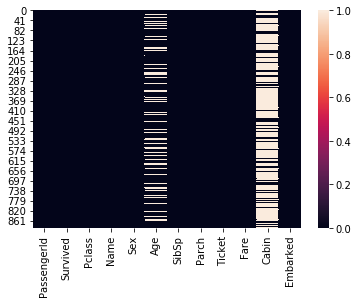

In [6]:
#without customization
sns.heatmap(train.isnull())

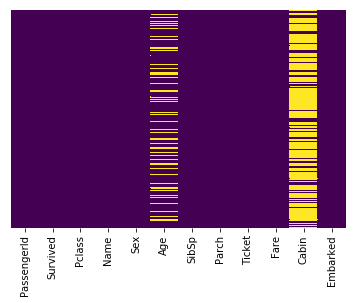

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

> `Age Column` : Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Filling the missing with avereage age of same aged people.

> `Cabin Column` : Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

In [10]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

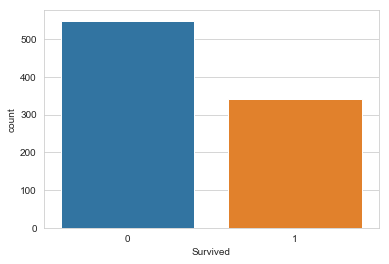

In [13]:
#apply count plot on Survived column: 0 for not survived, 1 for Survived 

sns.set_style('whitegrid')
sns.countplot(data =train, x='Survived')

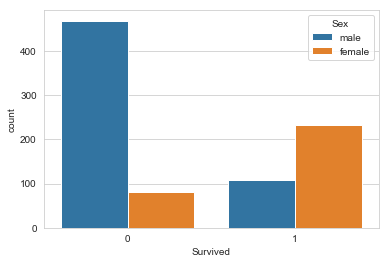

In [24]:
#Apply countplot with hue as sex for Survived column

sns.countplot(data=train, x='Survived', hue='Sex')

#Note: Male count more in not survival 

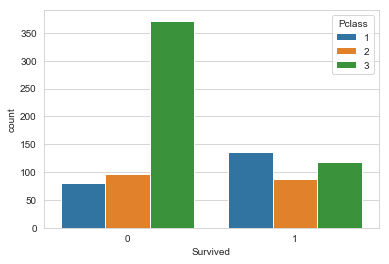

In [25]:
#Plot the graph for Survival column with hue as PClass column

sns.countplot(data=train, x='Survived', hue='Pclass')

#Notes: 3rd class people not survival chances are very less

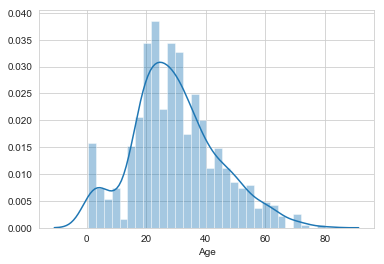

In [35]:
#Plot distplot for Age column by dropping missing data

sns.distplot(train['Age'].dropna(), bins=30)

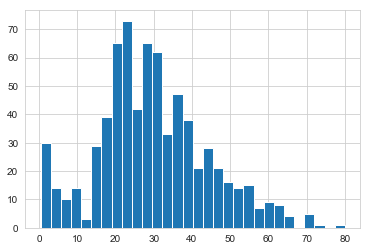

In [36]:
#Try above step with Pandas buildin function

train['Age'].hist(bins=30)

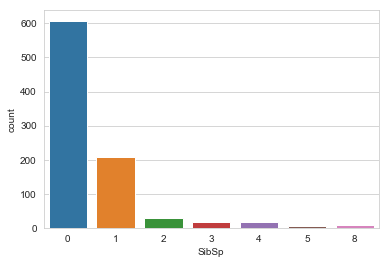

In [38]:
#check the counts of siblings onboarded 

sns.countplot(data=train, x='SibSp')

#note: most of the passengers are singles and having 1Spouse/sibling

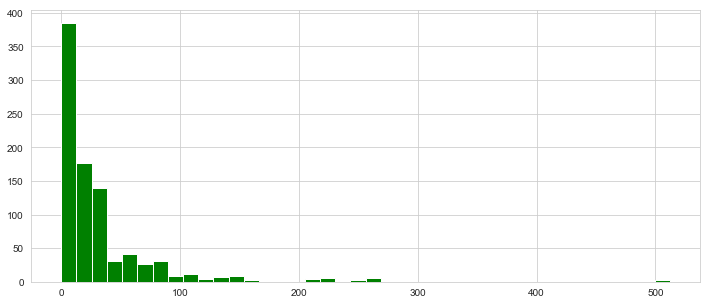

In [43]:
#check the fare column, how many passengers taken what kind of ticket range

train['Fare'].hist(bins=40, color='green', figsize=(12,5))

#note: most of them are taken cheap tickets

In [45]:
#Try with cufflinks for interactive graphs

import cufflinks as cf
cf.go_offline()

train['Fare'].iplot(kind='hist', bins=30)

### D). Data Cleaning

* We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). 

* But here we are diving the different age goups and applying the mean of groups to the missing data in respective group with respective to PClass.

"insights: Old(28-49) people opted class-1, mid(22-37) age people opted class-2, \nyounger people taken class-3 ticket.\n\nWe can see the wealthier passengers in the higher classes tend to be older, which makes sense. \nWe'll use these average age values to impute based on Pclass for Age."

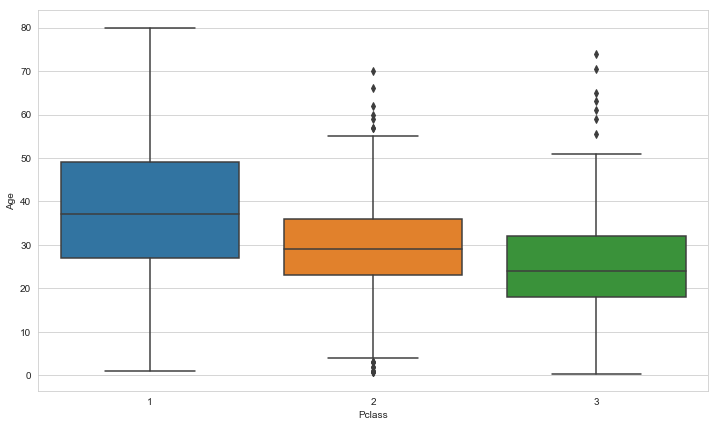

In [50]:
"""Check the different age groups with boxplot with respect to PClass(Ticket class) .
It means which age group apoted what kind of ticket."""

plt.figure(figsize=(12,7))
sns.boxplot(data=train, x='Pclass', y='Age')


"""insights: Old(28-49) people opted class-1, mid(22-37) age people opted class-2, 
younger people taken class-3 ticket.

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. 
We'll use these average age values to impute based on Pclass for Age."""

In [58]:
#create a function which guesses the age based on PClass. Function defination

def check_age(colName):
    Age = colName[0]
    PClass = colName[1]
    
    if pd.isnull(Age):
        
        if PClass == 1:
            return 37
        
        elif PClass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [59]:
#Function call

train['Age'] = train[['Age', 'Pclass']].apply(check_age, axis=1)

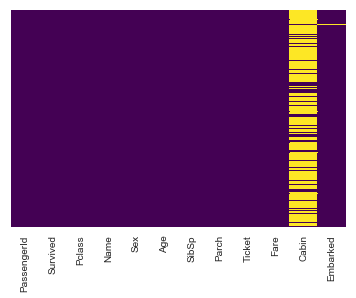

In [61]:
# Now check still any nulls there in Age column

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## we dont have any nulls in Age column, because we have applied function which guesses the age.

In [62]:
# Lets drop the Cabin column as it is having morethan 80% of nulls in it and wont help us in prediction.

train.drop('Cabin', axis=1, inplace=True)

In [63]:
#check the data with latest manipulate dataset

train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [65]:
train.dropna(inplace=True)

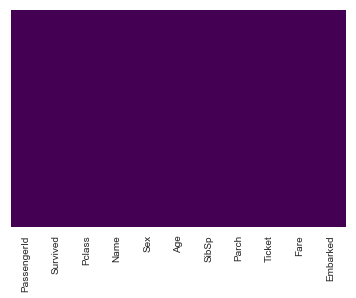

In [67]:
#Check still any nulls there in dataset

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### E). Converting Categorical Features to Numerical values

* Machine learning will not understand the string values, so we need to convert them to numerical.
* We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [74]:
#Use pd.get_dummies --> to create categories to numerical
#drop_first --> Male(1), Female(0) if we know 1 value, we can predict other value so delete first one.
#lets convert Sex, Embarked columsn into numerical columns

sex = pd.get_dummies(train['Sex'])
sex.head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [75]:
#do the above step by deleting first one.

sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [ ]:
#